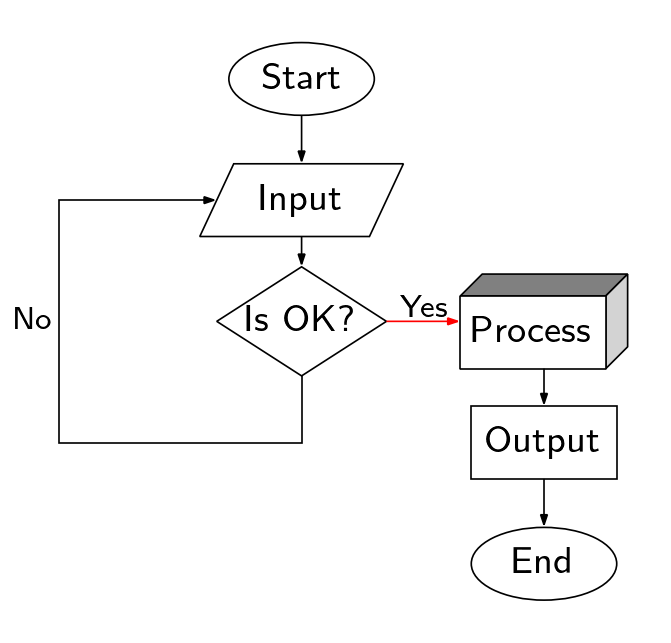

In [1]:
# general flowchart
import matplotlib.pyplot as plt
from cm_vis.scheme.flow import FlowScheme

# create flow scheme
plt.style.use("sans")
fig, ax = plt.subplots(dpi=300)
fs = FlowScheme(ax)

# add nodes
fs.add_node("start", shape="ellipse", center=(0, 3), width=1.2, height=0.6, text="Start")
fs.add_node("input", shape="parallelogram", center=(0, 2), width=1.4, height=0.6, text="Input")


fs.add_node("check", shape="diamond", center=(0, 1), width=1.4, height=0.9, text="Is OK?")
fs.add_node("process", shape="cube", center=(2, 1), width=1.2, height=0.6, text="Process")
fs.add_node("output", shape="rectangle", center=(2, 0), width=1.2, height=0.6, text="Output")
fs.add_node("end", shape="ellipse", center=(2, -1), width=1.2, height=0.6, text="End")

# connect nodes
fs.connect("start", "input", from_dir="bottom", to_dir="top")
fs.connect("input", "check", from_dir="bottom", to_dir="top")
fs.connect("check", "process", from_dir="right", to_dir="left", label="Yes", fc="r", ec="r")
fs.connect("process", "output", from_dir="bottom", to_dir="top")
fs.connect("output", "end", from_dir="bottom", to_dir="top")
fs.connect("check", "input", from_dir="bottom", to_dir="left", label="No", label_offset=0.2, via=[(0, 0), (-2, 0), (-2, 2)])  # loop

ax.autoscale(enable=True)
ax.set_aspect("equal")
ax.axis("off")

plt.show()

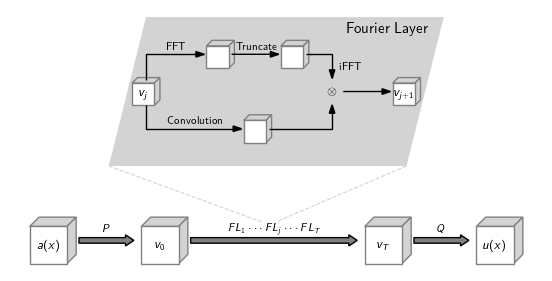

In [3]:
# FNO architecture
import matplotlib.pyplot as plt
from cm_vis.scheme.flow import FlowScheme
from matplotlib.patches import Polygon

plt.style.use("sans")
fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
fs = FlowScheme(ax, lw=1)

ax.autoscale(enable=True)
ax.set_aspect("equal")

# main flow
lc = {"width": 0.5, "height": 0.5, "depth": 0.25, "ec": "gray", "top_color": "lightgray"}
fs.add_node("a", shape="cube", center=(-0.5, 1), text="$a(x)$", **lc)
fs.add_node("v0", shape="cube", center=(1, 1), text="$v_0$", **lc)
fs.add_node("vt", shape="cube", center=(4, 1), text="$v_T$", **lc)
fs.add_node("u", shape="cube", center=(5.5, 1), text="$u(x)$", **lc)

la = {"type": "simple", "label_offset": 0.15, "head_offset": 0.1, "tail_offset": 0.1, "fc": "gray"}
fs.connect("a", "v0", label="$P$", **la)
fs.connect("v0", "vt", label=r"$FL_1 \cdots FL_j \cdots FL_T$", **la)
fs.connect("vt", "u", label="$Q$", **la)

# FL layer
sc = {"width": 0.3, "height": 0.3, "depth": 0.25, "ec": "gray", "top_color": "lightgray"}

xb, yb = 1 - 0.25, 3
fs.add_node("vj", shape="cube", center=(xb, yb), text="$v_j$", **sc)
fs.add_node("fft", shape="cube", center=(xb + 1, yb + 0.5), **sc)
fs.add_node("ifft", shape="cube", center=(xb + 2, yb + 0.5), **sc)
fs.add_node("cnn", shape="cube", center=(xb + 1.5, yb - 0.5), **sc)
fs.add_node("activation", shape="rectangle", center=(xb + 2.5, yb), text=r"$\otimes$", width=0.3, height=0.3, fc="None", ec="None")
fs.add_node("vj+1", shape="cube", center=(xb + 3.5, yb), **sc, text="$v_{j+1}$")

fs.connect("vj", "fft", from_dir="top", to_dir="left", via=[(xb, yb + 0.5)], label="FFT")
fs.connect("fft", "ifft", from_dir="right", to_dir="left", label="Truncate")
fs.connect("ifft", "activation", from_dir="right", to_dir="top", via=[(xb + 2.5, yb + 0.5)], label="iFFT", label_offset=0.25)
fs.connect("vj", "cnn", from_dir="bottom", to_dir="left", via=[(xb, yb - 0.5)], label="Convolution")
fs.connect("cnn", "activation", from_dir="right", to_dir="bottom", via=[(xb + 2.5, yb - 0.5)])
fs.connect("activation", "vj+1")

# bg for FL:
bg = Polygon(
    [[xb - 0.5, yb - 1], [xb + 3.5, yb - 1], [xb + 4, yb + 1], [xb, yb + 1]],  # 左下  # 右下  # 右上  # 左上
    closed=True,
    facecolor="lightgray",
    edgecolor="None",
    zorder=0,
)
ax.add_patch(bg)
fs.add_text(xb + 3.25, yb + 0.75, "Fourier Layer", fs="large")

# spy frame
ax.plot([xb - 0.5, 2.3], [yb - 1, 1.25], "--", color="lightgray")
ax.plot([xb + 3.5, 2.5], [yb - 1, 1.25], "--", color="lightgray")

ax.axis("off")
plt.show()